# 01-3 마켓과 머신러닝

## 생선 분류 문제

### 도미 데이터 준비하기

In [ ]:
# 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

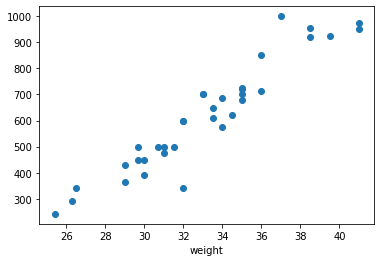

In [ ]:
# 도미 산점도 그래프
import matplotlib.pyplot as plt # matplotlib의 pyplot 함수를 plt로 줄여서 사용
  
plt.scatter(bream_length, bream_weight) # (x축에 놓을 데이터, y축에 놓을 데이터)
plt.xlabel('length') # x축 이름 표시 : x축은 길이
plt.xlabel('weight') # y축 이름 표시 : y축은 길이
plt.show() # 그래프 출력

### 빙어 데이터 준비하기

In [ ]:
# 생선의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 생선의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

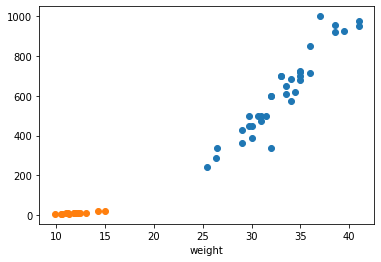

In [ ]:
# 도미와 빙어의 산점도 그래프
plt.scatter(bream_length, bream_weight) # 도미
plt.scatter(smelt_length, smelt_weight) # 빙어
plt.xlabel('length') 
plt.xlabel('weight') 
plt.show()

## 첫 번째 머신러닝 프로그램

### 도미와 빙어 합치기

In [ ]:
# 두 리스트를 더하여 하나의 리스트로 만들어 줌
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# length와 weight 리스트를 2차원 리스트로 만듦 
# length와 weight 리스트에서 원소를 하나씩 꺼내 [l, w]가 하나의 원소로 구성된 리스트 생성
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 정답 준비

In [ ]:
# 35마리의 도미, 14마리의 빙어
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### k-최근접 이웃

In [ ]:
# k-최근접 이웃 알고리즘을 구현한 클래스를 임포트
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 클래스 객체 생성
kn.fit(fish_data, fish_target) # 알고리즘 훈련
kn.score(fish_data, fish_target) # 모델을 평가

1.0

### 새로운 생선 예측

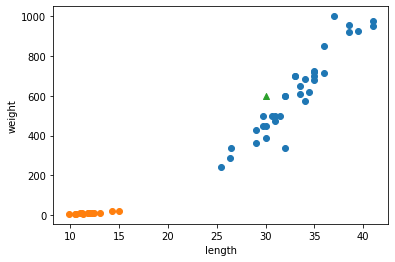

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 길이 30cm, 무게 600g인 생선은 도미와 빙어 중 무엇일까?
kn.predict([[30, 600]])

array([1])

### 무조건 도미

In [ ]:
# 가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 kn49 모델

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


### +) 확인 문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50): # 5부터 49까지 바꾸어 가면서
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
